# Simple Linear Regression

Import Required Packages

In [1]:
import matplotlib 
   
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error
import pandas as pd 
import math

Load Data

In [2]:
df = pd.read_csv("Housing.csv") 
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


Preprocess Data

In [3]:
#For simple linear regression, we are using only a single input feature 'lotsize'
X = df['lotsize'] 

#The output variable is the 'price'
Y = df['price'] 

training_percentage = 0.8

training_instance_count = round(len(X)*training_percentage)

#Reshape data so that every row contains an instance of data   
X=X.values.reshape(len(X),1) 
Y=Y.values.reshape(len(Y),1) 


#Split the data into training and test part
X_train = X[:training_instance_count]
Y_train = Y[:training_instance_count]

X_test = X[training_instance_count:]
Y_test = Y[training_instance_count:]
   

Run the model and get the squared error

In [4]:
# Create linear regression object 
regr = linear_model.LinearRegression() 
   
# Train the model using the training sets 
regr.fit(X_train, Y_train) 

#Print the slope (coefficeint) and intercepts (bias) values
print("Slope: ",regr.coef_, "\t Intercept: ",regr.intercept_)


Slope:  [[7.37136037]] 	 Intercept:  [29272.20745334]


Draw the output 

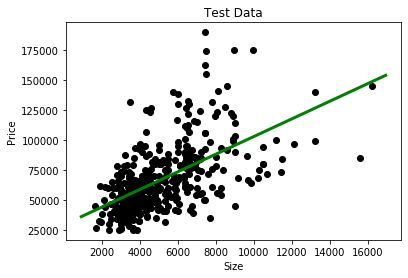

In [5]:
# Plot outputs
def setFigureValues():
    plt.scatter(X_train, Y_train,  color='black') 
    plt.title('Test Data') 
    plt.xlabel('Size') 
    plt.ylabel('Price') 
    plt.xticks() 
    plt.yticks() 

    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = regr.intercept_ + np.squeeze(regr.coef_)* x_vals
    plt.plot(x_vals, y_vals, color='green',linewidth=3)
    

setFigureValues()
plt.savefig("Output.png")

[[58757.64893576]
 [66129.00930637]]


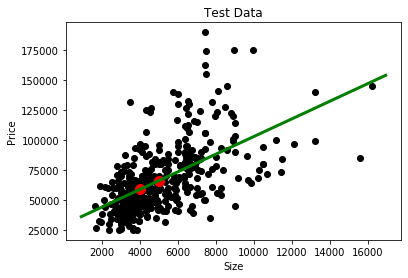

In [6]:
X_test_Sample = [[4000],[5000]]
setFigureValues()
plt.scatter(X_test_Sample, regr.predict(X_test_Sample), s=100, color='red')
plt.savefig("Output.png")
print(regr.predict(X_test_Sample))

Performance Measure: Mean Squared Error

In [7]:
mse = mean_squared_error(Y_test, regr.predict(X_test))
print('Mean square error', mse)

Mean square error 546745171.9658425


In [8]:
regr.intercept_ = 50000
regr.coeff_ = 0
mse = mean_squared_error(Y_test, regr.predict(X_test))
print('Mean square error', mse)

Mean square error 792624346.327486


References

1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#:~:text=Ordinary%20least%20squares%20Linear%20Regression,predicted%20by%20the%20linear%20approximation.&text=Whether%20to%20calculate%20the%20intercept%20for%20this%20model.
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
3. https://www.geeksforgeeks.org/regression-classification-supervised-machine-learning/#:~:text=A%20regression%20problem%20is%20when,salary%E2%80%9D%20or%20%E2%80%9Cweight%E2%80%9D.    
